# **คณันสักก์ สุจารีย์ 163404140001 วต.3-1**

In [1]:
import cv2 as cv # import library opencv โดยย่อเป็น cv
import numpy as np # import library numpy โดยย่อเป็น np
from matplotlib import pyplot as plt # import library matplotlib ในส่วนย่อย pyplot โดยย่อเป็น plt

In [21]:
!wget https://www.seekpng.com/png/small/6-60783_eight-pointed-star-emblem-bo-8-point-star.png

--2022-10-02 06:11:13--  https://www.seekpng.com/png/small/6-60783_eight-pointed-star-emblem-bo-8-point-star.png
Resolving www.seekpng.com (www.seekpng.com)... 208.110.80.75
Connecting to www.seekpng.com (www.seekpng.com)|208.110.80.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16471 (16K) [image/png]
Saving to: ‘6-60783_eight-pointed-star-emblem-bo-8-point-star.png’

6-60783_eight-point 100%[===================>]  16.08K  --.-KB/s    in 0s      

2022-10-02 06:11:13 (251 MB/s) - ‘6-60783_eight-pointed-star-emblem-bo-8-point-star.png’ saved [16471/16471]



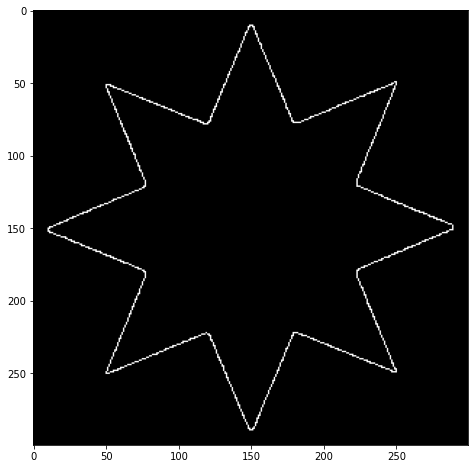

In [23]:
src = cv.imread("./STAR.png")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY)
canny_image = cv.Canny(gray_img, 50, 150)
plt.rcParams["figure.figsize"] = [8, 8]
plt.imshow(canny_image,cmap='gray')
plt.show()

## Contour Finding 

(array([[[149,  10]],

       [[148,  11]],

       [[148,  13]],

       ...,

       [[152,  13]],

       [[152,  11]],

       [[151,  10]]], dtype=int32),)


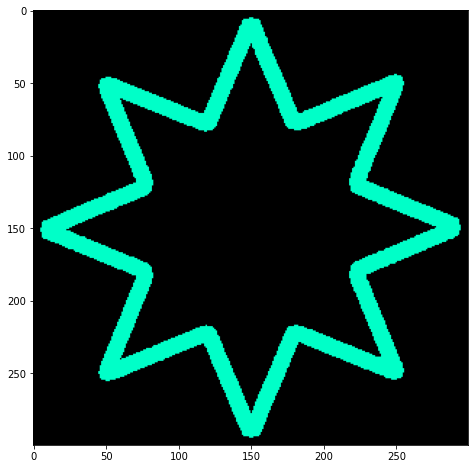

In [24]:
contours, hierarchy = cv.findContours(canny_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
edge_img = canny_image.copy()
print(contours)
drawn_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) # สร้างภาพเปล่าๆ ขึ้นมาเพื่อวาด Contourที่เราหาได้
drawn_contour_img = cv.cvtColor(drawn_contour_img,cv.COLOR_GRAY2RGB)
cv.drawContours(drawn_contour_img, contours, -1, (0,255,200), 10) # -1 วาด วาดทุกอัน // ถ้าบางอัน ใส่เลขindexของContourที่ต้องการวาด
plt.imshow(drawn_contour_img)
plt.show()

## Polygon Approximation

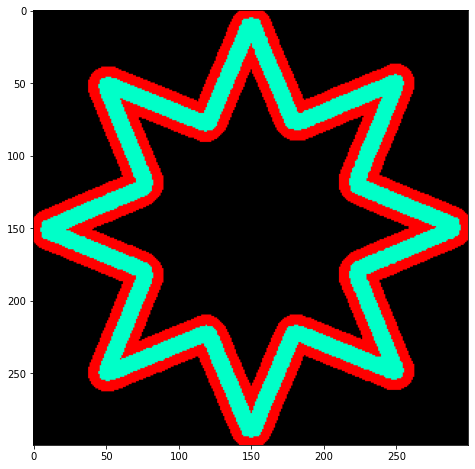

In [25]:
contours_approx = []
for i,value in enumerate(contours):
    contours_approx.append( cv.approxPolyDP(contours[i],0.0002*cv.arcLength(contours[i],True),True) )
drawn_approx_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) # สร้างภาพเปล่าๆ ขึ้นมาเพื่อวาด Contourที่เราหาได้
drawn_approx_contour_img = cv.cvtColor(drawn_approx_contour_img,cv.COLOR_GRAY2RGB)
''' plot จุดยอด'''
for i,values in enumerate(contours_approx):
    for j,dot in enumerate(values):
        drawn_approx_contour_img = cv.circle(drawn_approx_contour_img, dot[0], 10, (255,0,0), 3)
''' ลากเส้นระหว่างจุด '''
cv.drawContours(drawn_approx_contour_img, contours_approx, -1, (0,255,200), 10) # -1 วาด วาดทุกอัน // ถ้าบางอัน ใส่เลขindexของContourที่ต้องการวาด
plt.imshow(drawn_approx_contour_img)
plt.show()

## Moment / Centroid

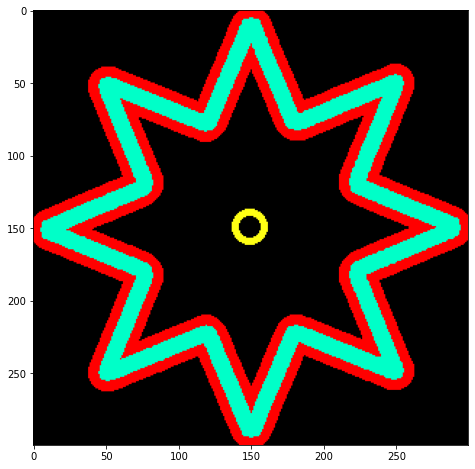

In [26]:
M = cv.moments(contours[0]) # get moment
cx = int(M['m10']/M['m00']) # get centroid x
cy = int(M['m01']/M['m00']) # get centroid y
drawn_approx_contour_img = cv.circle(drawn_approx_contour_img, (cx,cy), 10, (255,255,20), 3) #สีเหลือง
plt.imshow(drawn_approx_contour_img)
plt.show()

## Rectangle Boundary

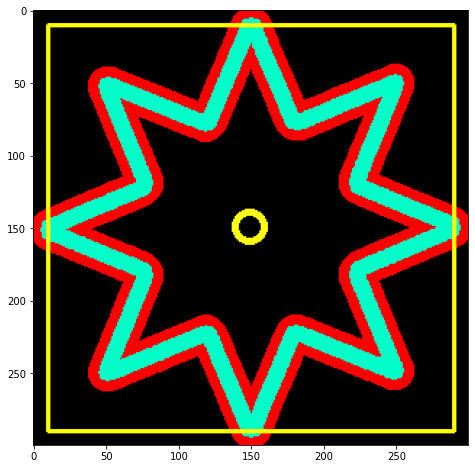

In [29]:
x,y,w,h = cv.boundingRect(contours[0])
cv.rectangle(drawn_approx_contour_img,(x,y),(x+w,y+h),(255,255,0),1)
plt.imshow(drawn_approx_contour_img)
plt.show()

## Center

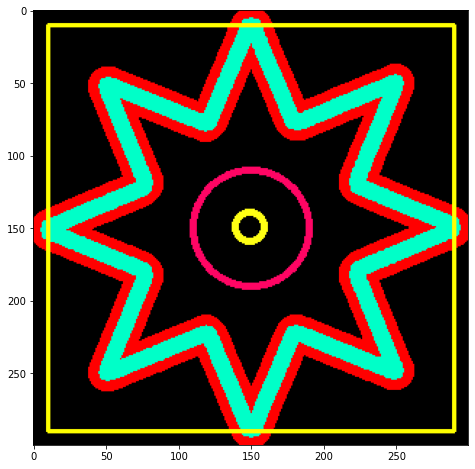

In [30]:
center = [x+(w//2), y+(h//2)]
drawn_approx_contour_img = cv.circle(drawn_approx_contour_img, center, 40, (255,5,100), 3) # สีชมพู
plt.imshow(drawn_approx_contour_img)
plt.show()

## Rotated Rect

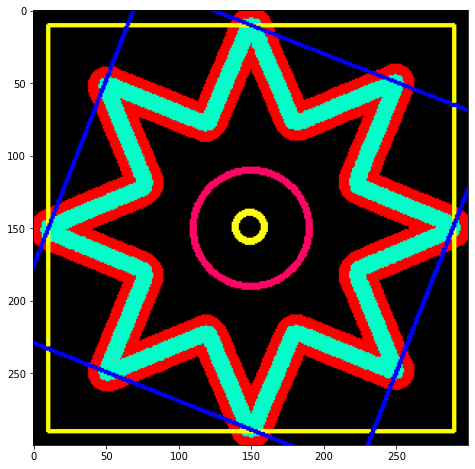

In [31]:
rect = cv.minAreaRect(contours[0])
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(drawn_approx_contour_img,[box],0,(0,0,255),2) # สีน้ำเงิน
plt.imshow(drawn_approx_contour_img)
plt.show()


## Min Circle

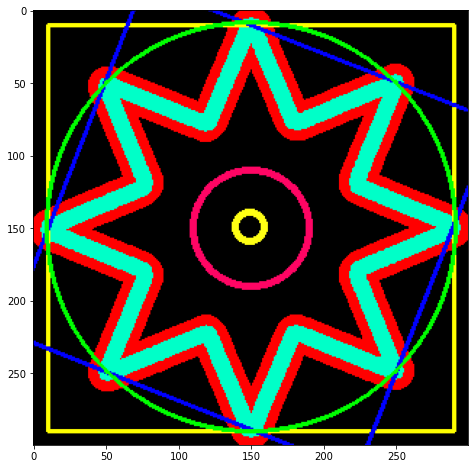

In [32]:
(x,y),radius = cv.minEnclosingCircle(contours[0])
center = (int(x),int(y))
radius = int(radius)
cv.circle(drawn_approx_contour_img,center,radius,(0,255,0),2) # สีเขียว
plt.imshow(drawn_approx_contour_img)
plt.show()

## Min Ellipse

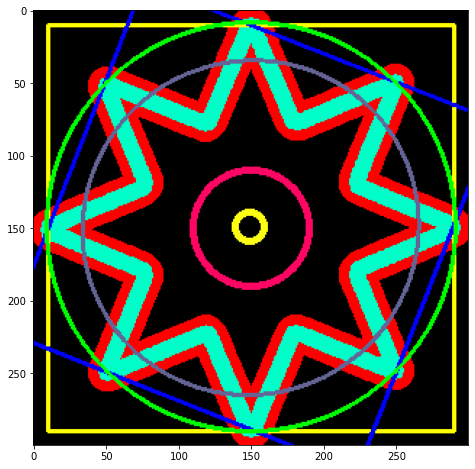

In [33]:
ellipse = cv.fitEllipse(contours[0])
cv.ellipse(drawn_approx_contour_img,ellipse,(100,100,150),2) # สีม่วง
plt.imshow(drawn_approx_contour_img)
plt.show()